In [93]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.cm import get_cmap

from dendrons_pore import dendrons_pore
from create_in import create_in
from out_reader import out_reader

Параметры

In [94]:
Cs_range = [0.001, 0.006, 0.01]
chi = 0.5
alpha = 0.5
S = 300

D = 190
n = 50

g = 3
q = 2

Структура полимера:

In [95]:
# Первое поколоение g = 1, q = 2
g1_q2 = f'(P0)1(P){n-2}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
print(f"Первое поколение разветвленность 2 {g1_q2=}")

# Второе поколение g = 2, q = 2

g2_q2 = f'(P0)1(P){n-2}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
print(f"Второе поколение разветвленность 2 {g2_q2=}")

# Третье поколение g = 3, q = 2

g3_q2 = f'(P0)1(P){n-2}(E)1[(P){n-1}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
print(f"Третье поколение разветвленность 2 {g3_q2=}")

Первое поколение разветвленность 2 g1_q2='(P0)1(P)48(E)1[(P)49(E)1](P)49(E)1'
Второе поколение разветвленность 2 g2_q2='(P0)1(P)48(E)1[(P)49(E)1[(P)49(E)1](P)49(E)1](P)49(E)1[(P)49(E)1](P)49(E)1'
Третье поколение разветвленность 2 g3_q2='(P0)1(P)48(E)1[(P)49(E)1[(P)49(E)1[(P)49(E)1](P)49(E)1](P)49(E)1[(P)49(E)1](P)49(E)1](P)49(E)1[(P)49(E)1[(P)49(E)1](P)49(E)1](P)49(E)1[(P)49(E)1](P)49(E)1'


In [96]:
phi_theory = {}

for cs in Cs_range:
    N, theta, H_dendrons, r_in_dendrons, r_out_dendrons,\
        psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, rho_dendrons = dendrons_pore(
        
        Cs = cs,
        #параметры щетки
        alpha = alpha,
        S = S,
        
        #параметры поры
        D = D,
        
        #параметры дендрона
        g = g,
        q = q,
        n = n)
    
    phi_theory[cs] = (r_in_dendrons, c_pol_dendrons)

In [97]:
phi_SCF, ends_SCF = {}, {}

for cs in Cs_range:
    file_name_pro = create_in(template_pore = '/home/tpopova/prj/PB_SCF/01_dendrone_pore/scf_templates/dendr_template.in',
        
        #название параметра
        range_param = 'Cs',
        min_val  = 0.1,
        max_val  = 0.1,
        
        Cs  = cs,
        chi = chi, 
        
        D  = D,
        N  = N,
        S  = S,
        alpha  = alpha,
        
        pol_structure  = f"{g3_q2}")
    
    # парсим профили
    psi, phi_brush, phi_end_brush = out_reader(file_names = file_name_pro)
    
    coord = np.arange(D)
    
    phi_SCF[cs] = (coord, phi_brush)
    ends_SCF[cs] = (coord, phi_end_brush)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.645147e+00 |g| = 7.884245e+00 alpha = 1.000000e+00 
hessian scaling: 3.37385
it =  1  E = 2.446528e+00 |g| = 7.419136e+00 alpha = 1.126835e-01 
it =  2  E = 1.912990e+00 |g| = 8.237955e+00 alpha = 1.936891e-01 
it =  3  E = 3.095465e+00 |g| = 6.990855e+00 alpha = 4.191130e-02 
it =  4  E = 3.423705e+01 |g| = 6.836339e+00 alpha = 4.453453e-04 
it =  5  E = 5.134731e+00 |g| = 6.720717e+00 alpha = 1.816917e-02 
it =  6  E = 1.692976e+00 |g| = 7.835113e+00 alpha = 1.853857e-01 
it =  7  E = 2.022612e+00 |g| = 7.957256e+00 alpha = 1.414543e-01 
it =  8  E = 4.596515e+00 |g| = 7.797849e+00 alpha = 2.505033e-02 
it =  9  E = 9.492744e+00 |g| = 7.913918e+00 alpha = 6.389538e-03 
it =  10  E = 7.436519e+00 |g| = 7.885997e+00

/tmp/ipykernel_2225560/3348397986.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


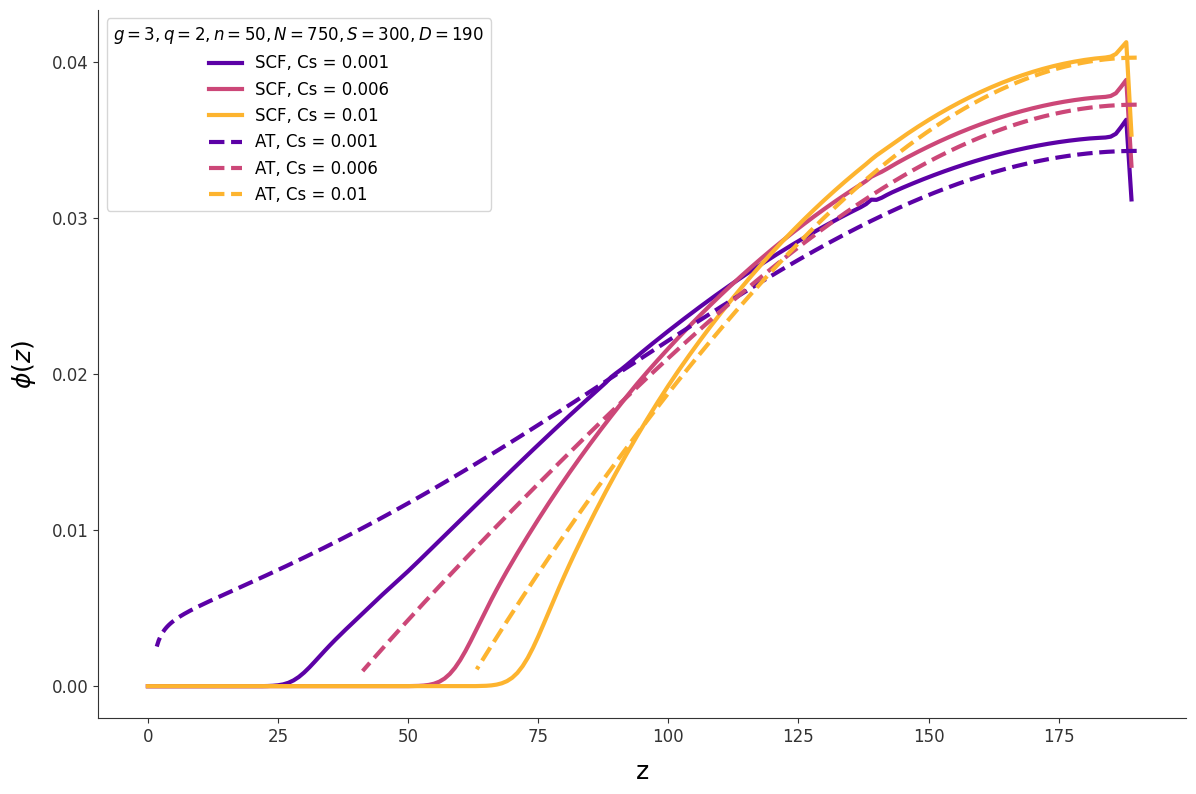

In [98]:
# Построение графиков
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")

for i, (cs, (coord, phi_brush)) in enumerate(phi_SCF.items()):
    base_color = color_map((i + 0.5) / len(Cs_range))  # базовый цвет
    solid_color = base_color  # цвет для сплошной линии
    
    plt.plot(coord, phi_brush, label=f"SCF, Cs = {cs}", linewidth=3, color=solid_color, linestyle="-")

for i, (cs, (r_in_dendrons, c_pol_dendrons)) in enumerate(phi_theory.items()):
    base_color = color_map((i + 0.5) / len(Cs_range))  # базовый цвет
    solid_color = base_color  # цвет для сплошной линии
    
    plt.plot(r_in_dendrons, c_pol_dendrons, label=f"AT, Cs = {cs}", linewidth=3, color=solid_color, linestyle="--")


# Настройка визуализации
plt.xlabel("z", fontsize=18, labelpad=10)
plt.ylabel("$\\phi(z)$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title=f"$g = {g}, q = {q},n = {n}, N = {N}, S = {S}, D = {D}$", title_fontsize=12, loc="upper left")
plt.tight_layout()
# plt.ylim(0, 0.03)
# plt.xlim(15, 101)

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
plt.savefig('Fig2.pdf', dpi=300, bbox_inches='tight')
plt.show()
